참고 : https://www.tensorflow.org/guide/migrate?hl=ko

### Chapter 4
### 최적화 이론에 필요한 선형대수와 미분

In [ ]:
import tensorflow as tf
import numpy as np 

##### 벡터/벡터 연산
덧셈/뺄셈
$$x+y = \begin{bmatrix}
x_1 + y_1 \\
x_2 + y_2 \\
\vdots \\
x_n + y_n
\end{bmatrix} \in R^n$$

내적 표기법
1) $$x \cdot y$$
2) $$<x, y>$$
3) $${x^T}y$$


In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x = tf.constant([[1],[2],[3]])
y = tf.constant([[4],[5],[6]])
xT = tf.transpose(x)
inner_product = tf.matmul(xT, y)
print(inner_product)

tf.Tensor([[32]], shape=(1, 1), dtype=int32)


###### 벡터의 크기(norm)
$$||x||_2 = \sqrt{{x_1}^2 + {x_2}^2 + ... + {x_n}^2} = \sqrt{{x^T}x}$$

In [3]:
x = tf.constant([[1],[2],[3]], dtype=tf.float32)
xT = tf.transpose(x)
xf = tf.matmul(xT, x)
print(x)
print(xT)
print(xf)
x_norm = tf.sqrt(xf)
print(x_norm)

tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor([[1. 2. 3.]], shape=(1, 3), dtype=float32)
tf.Tensor([[14.]], shape=(1, 1), dtype=float32)
tf.Tensor([[3.7416575]], shape=(1, 1), dtype=float32)


In [4]:
x = tf.constant([[1],[2],[3]], dtype=tf.float64)
x_norm = tf.norm(x)
print(x_norm)

tf.Tensor(3.7416573867739413, shape=(), dtype=float64)


##### 행렬/벡터 연산
$$b_i = \sum_{k=1} ^ nA_{ik} x_k$$

In [ ]:
A = tf.constant([[1]])
x = tf.constant([[1]])
b = tf.matmul(A, x)
A1 = tf.shape(A)
x1 = tf.shape(x)
b1 = tf.shape(b)
print(A1)
print(x1)
print(b1)

tf.Tensor([1 1], shape=(2,), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int32)


$$ A \in R^{4\times4}, x \in R^4 $$ 일때,
$$ Ax = b$$의 행렬 표현



$$\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{bmatrix} \begin{bmatrix} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix} = \begin{bmatrix} 
a_{11}x_1 & a_{12}x_2 & a_{13}x_3 & a_{14}x_4 \\
a_{21}x_1 & a_{22}x_2 & a_{23}x_3 & a_{24}x_4 \\
a_{31}x_1 & a_{32}x_2 & a_{33}x_3 & a_{34}x_4 \\
a_{41}x_1 & a_{42}x_2 & a_{43}x_3 & a_{44}x_4 \\
\end{bmatrix}$$

메모 : $$y=Ax+b$$

###### 예제 1 : 1x1 행렬과 1차원 벡터
$$ A = \begin{bmatrix} 1 \end{bmatrix} \in R^{1\times1}$$
$$ x = \begin{bmatrix} 1 \end{bmatrix} \in R^1 $$
$$ b = R^1 $$


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
A = tf.constant([[1]], dtype = tf.float32)
x = tf.constant([[1]], dtype = tf.float32)
b = tf.matmul(A,x)
print(A)
print(x)
print(b)
print(b.shape)

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
(1, 1)


###### 예제 2 : 1x2 행렬과 2차원 벡터
행렬의 열과 벡터의 차원은 같아야 하므로 벡터의 차원도 2차원으로 증가함.
$$A =\begin{bmatrix} 1 & 4 \end{bmatrix} \in R^{1\times2}$$
A의 행은 증가하지 않고 여전히 1차원임.
$$b \in R^{1}$$
$$\begin{bmatrix} 1 & 4 \end{bmatrix} 
\begin{bmatrix} 1 \\
2 \end{bmatrix} = \begin{bmatrix} b_1 \end{bmatrix} $$

In [ ]:
A = tf.constant([[1, 4]])
x = tf.constant([[1], [2]])
b = tf.matmul(A, x)
print(b)
print(A.shape)
print(x.shape)
print(b.shape)

tf.Tensor([[9]], shape=(1, 1), dtype=int32)
(1, 2)
(2, 1)
(1, 1)


###### 예제 3 : 2x2 행렬과 2차원 벡터
이번엔 결과값이 2차원 벡터로 변경된 것임.
$$A = \begin{bmatrix} 1 & 4 \\
9 & 5 \end{bmatrix} \in R^{2 \times 2}$$

$$x = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \in R^2$$
$$b \in R^2 $$

행렬의 크기가 바뀔때마다 x 혹은 b의 모양이 바뀌는 것이 행렬과 벡터의 곱에서 가장 간과되는 부분.
이 부분에서 많은 사람들이 어려움을 겪기 때문에 유의 바람.

다음 코드는 다음 나타낼 식을 계산하는 코드임.
$$\begin{bmatrix} 1 & 4 \\
9 & 5 \end{bmatrix}
\begin{bmatrix} 1 \\ 2 \end{bmatrix}
= \begin{bmatrix} 9 \\ 19 \end{bmatrix}$$

In [ ]:
A = tf.constant([[1, 4], [9, 5]])
x = tf.constant([[1], [2]])
b = tf.matmul(A, x)
print(b)
print(A.shape)
print(x.shape)
print(b.shape)

tf.Tensor(
[[ 9]
 [19]], shape=(2, 1), dtype=int32)
(2, 2)
(2, 1)
(2, 1)


###### 예제 4 : 3x2 행렬과 2차원 벡터
예제 3에서 행렬의 행의 개수를 1개 더 추가하였음.
마찬가지로 벡터도 차원이 3차원으로 늘어남.

$$ A= \begin{bmatrix} 1 & 4 \\
9 & 5 \\
4 & 0 \end{bmatrix} \in R^{3\times2} \\ $$
$$x = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \in R^2 \\ $$
$$ b \in R^3 $$


$$\begin{bmatrix} 1 & 4 \\ 9 & 5 \\ 4 & 0\end{bmatrix}
\begin{bmatrix} 1 \\ 2 \end{bmatrix} = 
\begin{bmatrix} 9 \\ 19 \\ 4 \end{bmatrix}$$

In [ ]:
A = tf.constant([[1,4], [9, 5], [4, 0]])
x = tf.constant([[1], [2]])
b = tf.matmul(A, x)
print(b)
print(A.shape)
print(x.shape)
print(b.shape)

tf.Tensor(
[[ 9]
 [19]
 [ 4]], shape=(3, 1), dtype=int32)
(3, 2)
(2, 1)
(3, 1)


###### 예제 5 : 4x2 행결과 2차원 벡터
$$A = \begin{bmatrix} 1 & 4 \\
9 & 5 \\
4 & 0 \\
6 & 1 \end{bmatrix} \in R^{4 \times 2}$$

$$x = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \in R^2 $$

예제 3과 마찬가지로 결과값 벡터가 4차원이 됨.
$$b \in R^4 $$

$$\begin{bmatrix} 1 & 4 \\ 9 & 5 \\ 4 & 0 \\ 6 & 1 \end{bmatrix}
\begin{bmatrix} 1 \\ 2 \end{bmatrix} = 
\begin{bmatrix} 9 \\ 19 \\ 4 \\ 8 \end{bmatrix}$$

In [ ]:
A = tf.constant([[1, 4], [9, 5], [4, 0], [6, 1]])
x = tf.constant([[1], [2]])
b = tf.matmul(A, x)
print(b)
print(A.shape)
print(x.shape)
print(b.shape)

tf.Tensor(
[[ 9]
 [19]
 [ 4]
 [ 8]], shape=(4, 1), dtype=int32)
(4, 2)
(2, 1)
(4, 1)


###### 예제 6 : 4x3 행렬과 3차원 벡터
예제 5에서 A의 열 개수를 증가시켰음.
이번엔 행렬 A에 곱해지는 벡터 x의 차원이 변함.
행렬의 열 개수가 3개이므로 벡터도 3차원이 됨.

$$A=\begin{bmatrix} 1 & 4 & 2 \\
9 & 5 & 0 \\
4 & 0 & 2 \\
6 & 1 & 8 \end{bmatrix} \in R^{4 \times 3} \\ $$

$$x = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \in R^3 $$


반면에 결과값 벡터는 예제 5와 같은 모양인 4차원 벡터임.

$$ b \in R^4 $$

$$\begin{bmatrix} 1 & 4 & 2 \\
9 & 5 & 0 \\
4 & 0 & 2 \\ 
6 & 1 & 8 \end{bmatrix}
\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}
=\begin{bmatrix} 15 \\ 19 \\ 10 \\ 32 \end{bmatrix}$$

In [ ]:
A = tf.constant([[1, 4, 2], [9, 5, 0], [4, 0, 2], [6, 1, 8]])
x = tf.constant([[1], [2], [3]])
b = tf.matmul(A, x)
print(b)
print(A.shape)
print(x.shape)
print(b.shape)

tf.Tensor(
[[15]
 [19]
 [10]
 [32]], shape=(4, 1), dtype=int32)
(4, 3)
(3, 1)
(4, 1)


###### 예제 7 : 4x4 행렬과 4차원 벡터
예제 6과 마찬가지로 열의 개수를 늘렸음.
벡터 x의 차원이 4로 증가.
$$A = \begin{bmatrix} 1 & 4 & 2 & 0 \\ 
9 & 5 & 0 & 0 \\
4 & 0 & 2 & 4 \\
6 & 1 & 8 & 3 \end{bmatrix} \in R^{4 \times 4}$$

$$x = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}$$

결과값의 차원은 여전히 4차원임.

$$b \in R^4$$

$$ \begin{bmatrix} 1 & 4 & 2 & 0 \\ 
9 & 5 & 0 & 0 \\
4 & 0 & 2 & 4 \\
6 & 1 & 8 & 3 \end{bmatrix} 
\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix} =
\begin{bmatrix} 15 \\ 19 \\ 26 \\ 44 \end{bmatrix}$$

In [ ]:
A = tf.constant([[1, 4, 2, 0], [9, 5, 0, 0], [4, 0, 2, 4], [6, 1, 8, 3]])
x = tf.constant([[1], [2], [3], [4]])
b = tf.matmul(A, x)
print(b)
print(A.shape)
print(x.shape)
print(b.shape)

tf.Tensor(
[[15]
 [19]
 [26]
 [44]], shape=(4, 1), dtype=int32)
(4, 4)
(4, 1)
(4, 1)


###### 예제 8 : 4x5 행렬과 5차원 벡터
행렬 곱의 마지막 예제임.
행렬의 열수도 5개, 따라서 곱할 벡터도 5차원

$$A = \begin{bmatrix} 1 & 4 & 2 & 0 & 2 \\
9 & 5 & 0 & 0 & 5 \\
4 & 0 & 2 & 4 & 6 \\
6 & 1 & 8 & 3 & 1 \end{bmatrix} \in R^{4 \times 5}$$

$$x = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \\ 5 \end{bmatrix} \in R^5 $$


$$b \in R^4 $$

$$\begin{bmatrix} 1 & 4 & 2 & 0 & 2 \\
9 & 5 & 0 & 0 & 5 \\
4 & 0 & 2 & 4 & 7 \\
6 & 1 & 8 & 3 & 1 \end{bmatrix} 
\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \\ 5 \end{bmatrix} =
\begin{bmatrix} 25 \\ 44 \\ 61 \\ 49 \end{bmatrix}$$

In [ ]:
A = tf.constant([[1,4,2,0,2], [9,5,0,0,5], [4,0,2,4,7], [6,1,8,3,1]])
x = tf.constant([[1], [2], [3], [4], [5]])
b = tf.matmul(A, x)
print(b)
print(A.shape)
print(x.shape)
print(b.shape)

tf.Tensor(
[[25]
 [44]
 [61]
 [49]], shape=(4, 1), dtype=int32)
(4, 5)
(5, 1)
(4, 1)


##### 행렬/행렬 연산


###### 예제 1 : 4x4 행렬과 4x3 행렬의 곱
$$A = \begin{bmatrix} 1 & 4 & 2 & 0 \\
9 & 5 & 0 & 0 \\
4 & 0 & 2 & 4 \\
6 & 1 & 8 & 3 \end{bmatrix} \in R^{4 \times 4}$$

$$B = \begin{bmatrix} 1 & 5 & 9 \\
2 & 6 & 10 \\
3 & 7 & 11 \\
4 & 8 & 12 \end{bmatrix} \in R^{4 \times 3}$$

$$C \in R^{4 \times 3}$$

$$\begin{bmatrix} 1 & 4 & 2 & 0 \\
9 & 5 & 0 & 0 \\
4 & 0 & 2 & 4 \\
6 & 1 & 8 & 3 \end{bmatrix} 
\begin{bmatrix} 1 & 5 & 9 \\
2 & 6 & 10 \\
3 & 7 & 11 \\
4 & 8 & 12 \end{bmatrix} =
\begin{bmatrix} 15 & 43 & 71 \\
19 & 75 & 131 \\
26 & 66 & 106 \\
44 & 116 & 188 \end{bmatrix}$$

In [ ]:
A = tf.constant([[1, 4, 2, 0], [9, 5, 0, 0], [4, 0, 2, 4], [6, 1, 8, 3]])
B = tf.constant([[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]])
C = tf.matmul(A, B)
print(C)
print(A.shape)
print(B.shape)
print(C.shape)

tf.Tensor(
[[ 15  43  71]
 [ 19  75 131]
 [ 26  66 106]
 [ 44 116 188]], shape=(4, 3), dtype=int32)
(4, 4)
(4, 3)
(4, 3)


###### 예제 2 : 4x5 행렬과 5x2 행렬의 곱
예제 1에서 행렬 A의 열의 개수가 5개로, 행렬 B의 개수가 이에 맞추어 5개로 늘어남.

$$A = \begin{bmatrix} 1 & 4 & 2 & 0 & 2 \\
9 & 5 & 0 & 0 & 5 \\
4 & 0 & 2 & 4 & 6 \\
6 & 1 & 8 & 3 & 1 \end{bmatrix} \in R^{4 \times 5}$$

$$B = \begin{bmatrix} 1 & 6 \\
2 & 7 \\
3 & 8 \\
4 & 9 \\
5 & 10 \end{bmatrix} \in R^{5 \times 2}$$

$$C \in R^{4 \times 2} $$

$$ \begin{bmatrix} 1 & 4 & 2 & 0 & 2 \\
9 & 5 & 0 & 0 & 5 \\
4 & 0 & 2 & 4 & 6 \\
6 & 1 & 8 & 3 & 1 \end{bmatrix}
\begin{bmatrix} 1 & 6 \\
2 & 7 \\
3 & 8 \\
4 & 9 \\
5 & 10 \end{bmatrix} = 
\begin{bmatrix} 25 & 70 \\
44 & 139 \\
56 & 146 \\
49 & 144 \end{bmatrix}$$

In [ ]:
import tensorflow as tf
import numpy as np

A = tf.constant([[1, 4, 2, 0, 2], [9, 5, 0, 0, 5], [4, 0, 2, 4, 6], [6, 1, 8, 3, 1]])
B = tf.constant([[1, 6], [2, 7], [3, 8], [4, 9], [5, 10]])
C = tf.matmul(A, B)
print(C)
print(A.shape)
print(B.shape)
print(C.shape)

tf.Tensor(
[[ 25  70]
 [ 44 139]
 [ 56 136]
 [ 49 144]], shape=(4, 2), dtype=int32)
(4, 5)
(5, 2)
(4, 2)


##### 선형 시스템의 풀이

선형대수는 간단하게 생각하려고 복잡한 계산을 정의함.

###### 선형시스템의 해를 구하는 코드

결국 ax = b 와 같은 공식

$$A = \begin{bmatrix} 1 & 4 & 2 & 0 \\
9 & 5 & 0 & 0 \\
4 & 0 & 2 & 4 \\
6 & 1 & 8 & 3 \end{bmatrix} \in R^{4 \times 4}$$

$$b = \begin{bmatrix} 15 \\
19 \\
26 \\
44 \end{bmatrix} \in R^4 $$

위에서 주어진 행렬과 벡터를 이용해서 해를 구하려면 \\
tf.matrix.solve() 를 사용해야함.(1.0 Version 기준) \\
**tf.linalg.solve() (2.0 Version 기준)**

$$ x = A^{-1}b \in R^4 $$

첫번째 입력에는 A를, 두번째 입력에는 b를 순서대로 넣어주면 됨.

$$ \begin{bmatrix} 1 & 4 & 2 & 0 \\
9 & 5 & 0 & 0 \\
4 & 0 & 2 & 4 \\
6 & 1 & 8 & 3 \end{bmatrix}
\begin{bmatrix} x_1 \\
x_2 \\
x_3 \\
x_4 \end{bmatrix} = \begin{bmatrix} 15 \\
19 \\
26 \\
44 \end{bmatrix}$$

선형시스템을 풀때는 모양도 정확하게 맞아야 하고 \\
tf.linalg.solve()의 입력값도 신경써야 함.

In [ ]:
A = tf.constant([[1, 4, 2, 0], [9, 5, 0, 0], [4, 0, 2, 4], [6, 1, 8, 3]], dtype = tf.float64)
b = tf.constant([[15], [19], [26], [44]], dtype=tf.float64)
x = tf.linalg.solve(A, b)
print(x)
print(A.shape)
print(b.shape)
print(x.shape)

tf.Tensor(
[[1.]
 [2.]
 [3.]
 [4.]], shape=(4, 1), dtype=float64)
(4, 4)
(4, 1)
(4, 1)


#### 선형대수 표기법

주로 데이터를 나타낼 때의 행렬을 X 라고 표현함. \\
행의 갯수(m) 는 데이터의 갯수 \\
열의 갯수(n) 는 데이터의 자원 \\
열의 갯수(Feature)는 때로 특성의 차원으로 부르기도 함.

간단한 선형모델에서는 데이터에 곱해주는 웨이트(Weight)들은 w로 나타냄. \\

$$ w = \begin{bmatrix} w_1 \\
w_2 \\
\vdots \\
w_n \end{bmatrix} \in R^n $$


바이어스(Bias) 값은 b로 표현됨. b는 벡터 안의 모든 값이 상수인 특징을 갖고 있음.

$$b = \begin{bmatrix} b \\
b \\
\vdots \\ 
b \end{bmatrix} \in R^n $$

가장 간단한 선형모델을 나타내는 수식은 다음과 같음. \\

$$Xw+b = \begin{bmatrix} X_{11} & X_{12} & \cdots & X_{ln} \\
\vdots & \vdots & \cdots & \vdots \\
X_{m1} & X_{m2} & \cdots & X_{mn} \end{bmatrix}
\begin{bmatrix} w_1 \\
w_2 \\
\vdots \\
w_n \end{bmatrix} +
\begin{bmatrix} b \\
b \\
\vdots \\
b \end{bmatrix}$$

###### 예제 1 : 직선 위의 5개의 점과 선형모델

$$X = \begin{bmatrix} X_1 \\
X_2 \\
X_3 \\
X_4 \\
X_5 \end{bmatrix} = \begin{bmatrix} -1.0 \\
-0.1 \\
0.9 \\
2.0 \\
3.1 \end{bmatrix} \in R^{5 \times 1}$$ \\

$$ w = \begin{bmatrix} 2.0 \end{bmatrix} \in R^{1}, b = 
\begin{bmatrix} 1.0 \\
1.0 \\
1.0 \\
1.0 \\
1.0 \end{bmatrix} \in R^5 $$

$$y = Xw+b = \begin{bmatrix} X_1 \\ 
X_2 \\
X_3 \\
X_4 \\
X_5 \end{bmatrix}\begin{bmatrix} w \end{bmatrix} +
\begin{bmatrix} b \\
b \\
b \\ 
b \\ 
b \end{bmatrix} = \begin{bmatrix} -1.0 \\
-0.1 \\
0.9 \\
2.0 \\
3.1 \end{bmatrix} \begin{bmatrix} 2.0 \end{bmatrix} + \begin{bmatrix} 1.0 \end{bmatrix} =
\begin{bmatrix} -1.0 \times 2.0 + 1.0 \\
-0.1 \times 2.0 + 1.0 \\
0.9 \times 2.0 + 1.0 \\
2.0 \times 2.0 + 1.0 \\
3.1 \times 2.0 + 1.0 \end{bmatrix} = 
\begin{bmatrix} -1.0 \\ 
0.8 \\
2.8 \\
5.0 \\
7.2 \end{bmatrix}$$

In [ ]:
import tensorflow as tf
import numpy as np

constant : 값이 변하지 않는 상수 \\
Variable : 변수임. \\

[참고 링크](https://pasus.tistory.com/90)

In [ ]:
X = tf.constant([[-1.0], [-0.1], [0.9], [2.0], [3.1]])
w = tf.Variable([[2.0]])
b = tf.Variable(1.0)
y = tf.matmul(X, w) + b
print(y)
print(X.shape)
print(w.shape)
print(b.shape)
print(y.shape)

tf.Tensor(
[[-1. ]
 [ 0.8]
 [ 2.8]
 [ 5. ]
 [ 7.2]], shape=(5, 1), dtype=float32)
(5, 1)
(1, 1)
()
(5, 1)


구해진 값을 그래프로 그리기

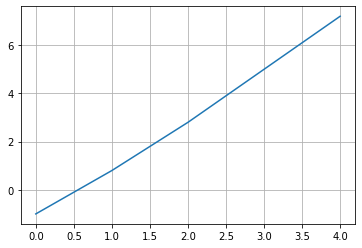

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.grid()

###### 예제 2 : 평면 위의 5개의 점과 선형모델

$$X = \begin{bmatrix} X_{11} & X_{12} \\
X_{21} & X_{22} \\
X_{31} & X_{32} \\
X_{41} & X_{42} \\
X_{51} & X_{52} \end{bmatrix} = 
\begin{bmatrix} -1.0 & 1.0 \\
-0.1 & 0.3 \\
0.9 & 1.2 \\
2.0 & 2.0 \\
3.1 & 2.9 \end{bmatrix} \in R^{5 \times 2}$$

선형모델 관련 파라미더는 다음과 같음. \
2차원 데이터이므로 기울기를 표시하는 w 가 2차원임.

$$w = \begin{bmatrix} 2.0 \\
1.0 \end{bmatrix} \in R^2 , b = \begin{bmatrix} 1.0 \\
1.0 \\
1.0 \\
1.0 \\
1.0 \end{bmatrix} \in R^5$$

예측값을 구하는 수식은 다음과 같음.

$$y = Xw+b = \begin{bmatrix} X_{11} & X_{12} \\
X_{21} & X_{22} \\
X_{31} & X_{32} \\
X_{41} & X_{42} \\
X_{51} & X_{52} \end{bmatrix} \begin{bmatrix} w_1 \\ 
w_2 \end{bmatrix} + \begin{bmatrix} b \\
b \\
b \\
b \\
b \end{bmatrix} = \begin{bmatrix} -1.0 & 1.0 \\
-0.1 & 0.3 \\
0.9 & 1.2 \\
2.0 & 2.0 \\
3.1 & 2.9 \end{bmatrix} 
\begin{bmatrix} 2.0 \\ 
1.0 \end{bmatrix} + \begin{bmatrix} 1.0 \\
1.0 \end{bmatrix} = \begin{bmatrix} -1.0 \times 2.0 + 1.0 \times + 1.0 \\
-0.1 \times 2.0 + 0.3 \times + 1.0 \\
0.9 \times 2.0 + 1.2 \times 1.0 + 1.0 \\
2.0 \times 2.0 + 2.0 \times 1.0 + 1.0 \\
3.1 \times 2.0 + 2.9 \times 1.0 + 1.0 \end{bmatrix} =
\begin{bmatrix} 0.0 \\
1.1 \\
4.0 \\
7.0 \\
10.1 \end{bmatrix}$$

바이어스에 해당하는 b는 실제로는 5차원 벡터지만, 텐서 덧셈이 적용되므로 스칼라값으로 선언해도 문제 없다고 함.(책 상에서의 표현)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
X = tf.constant([[-1.0, 1.0], [-0.1, 0.3], [0.9, 1.2], [2.0, 2.0], [3.1, 2.9]])
w = tf.Variable([[2.0], [1.0]])
b = tf.Variable(1.0)
y = tf.matmul(X, w) + b
print(y)
print(X.shape)
print(w.shape)
print(b.shape)
print(y.shape)

tf.Tensor(
[[ 0. ]
 [ 1.1]
 [ 4. ]
 [ 7. ]
 [10.1]], shape=(5, 1), dtype=float32)
(5, 2)
(2, 1)
()
(5, 1)


위의 모델을 그림으로 표현하면 다음과 같음.

<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


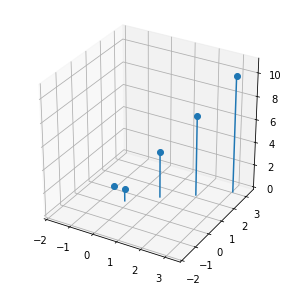

In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for (xi, yi), zi in zip(X, y):
  line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)), marker='o',
                    markevery=(1, 1))
  ax.add_line(line)

ax.set_xlim3d(-2, 3.5)
ax.set_ylim3d(-2, 3.5)
ax.set_zlim3d(0, 11)
plt.show

#### 미분과 그래디언트(Gradient)

**그래디언트** \
는 수치최적화 알고리즘의 가장 핵심적인 키워드 \



그래디언트는 딥러닝 관련해서 항상 등장하나, 실제로는 코드를 이용해서 계산할 일은 없음.

Tensorflow 같은 딥러닝 패키지가 자동으로 계산.

실습 대신 간단한 이론 및 공식만 숙지해도 충분함.

미적분보다 중요한 부분은 **수치최적화 알고리즘의 동작원리**임.

미분의 정의

$f(x)$의 미분은 어떤 지점$(x)$과 아주 작은 값인 $Δx$ 만큼 떨어진 지점$(x + Δx)$ 사이의 기울기 값의 극한값임. 다음은 이것을 수식으로 나타낸 것

$$f^\prime (x) = \lim_{Δx → 0} {{f(x+Δx)-f(x)} \over Δx}$$

위의 미분은 함수의 변수가 1개뿐인 단일변수 함수의 미분임.

딥러닝 모델에서는 차원이 매우 높아짐. 그러므로 다변수 함수의 미분을 정의해야함.

다변수 함수의 미분을 정의하기 위해서 편미분을 알아야 하고 그것을 다음과 같이 정의함.

2개의 변수를 가지는 함수 $f(x, y)$의 편미분은 다음과 같음.

$${\partial \over \partial x}f(x, y) = 
\lim_{Δx → 0} {f(x+Δx, y) -f(x, y) \over 
Δx} $$

$${∂ \over ∂y}f(x, y) =
\lim_{Δx → 0} {f(x, y + Δy)-f(x, y) \over 
Δy}$$

편미분은 각 방향(x, y)만의 기울기를 구하는 작업.
해당 변수외의 나머지 변수는 고정. 그러므로 표기법만 다를뿐, 단일 변수의 미분과 동일하다고 알 수 있음.

일반화를 시켜서 n개의 변수가 있는 함수 $f(x_1, x_2, ⋯, x_n)$의 편미분을 나타내면 다음과 같음. 

정수 $i = 1, 2, ⋯, n$에 대해서

$${∂ \over ∂x}f(x_1, x_2, ⋯, x_n) = \lim_{Δx → 0}{f(⋯, x_i+Δx_i, ⋯)
-f(x_1, x_2, ⋯, x_n) \over Δx_i}$$

그래디언트는 편미분을 모은 벡터.

일반적으로 $ ∇f $로 나타내고 정의는 다음과 같음.

$$∇f(x_1, x_2, ⋯, x_n) = \begin{bmatrix} {∂ \over ∂x_1}f(x_1, x_2, ⋯, x_n) \\ 
{∂ \over ∂x_2}f(x_1, x_2, ⋯, x_n) \\ 
\vdots \\
{∂ \over ∂x_n}f(x_1, x_2, ⋯, x_n) \end{bmatrix} \in R^n$$

그래디언트의 방향은 기하학적으로 중요한 정보를 담고 있음.
$(x, y)$ 위치에서 $∇f(x, y)$의 방향은 함수 $f(x, y)$가 가장 빠르게 증가하는 방향.

반대로 $-∇f(x, y)$는 가장 빠르게 감소하는 방향.

딥러닝 모델의 학습은 손실함수를 가장 작게 만들어가는 과정.
손실함수는 그래디언트의 방향에 많은 역할을 하게 됨.

### Chapter 5 
### 딥러닝에 필요한 최적화 이론

scikit-learn을 사용하기 위해서 수식들을 이해할 필요가 없음. \
패키지 자체가 사용하기 편리해서 간단한 입력값으로도 쉽게 모델들을 이용할 수 있음.

그러나 딥러닝을 위해서 Tensorflow를 사용한 경우, 편리하게 함수만 호출하여 사용할 수 없음.

선형 회귀 분석을 하기 위해 scikit-learn을 사용한 코드 예제와 Tensorflow를 사용한 코드 예제를 보면 이러한 차이를 금방 느낄 수 있음.

scikit-learn은 매우 간단한 코드로도 선형회귀 분석을 완료할 수 있음.

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

from sklearn import linear_model
reg = linear_model.LinearRegression()

LinearRegression()


###### 여담 :
책에서는 sklearn 코드와 Tensorflow와의 코드를 비교후 Tensorflow가 복잡하고 길다는 점을 강조하려고 하였지만, 현재 Tensorflow 2.0이 나왔고, 긴 코드를 강조하던 session과 placeholder가 완전히 사라짐으로써 긴 코드는 해결이 되었다. 

그러나 아래 코드와 책의 코드를 비교한다면... 지금 이 폴더를 쓰고 있는 이가 얼마나 삽질을 많이 했는 지 알아 줬음 한다...

진짜 1.0에서 2.0으로 바꾸면서 많이 바뀌었다...

5.1 은 이것으로 대체한다. 똑같은 코드이기 때문이다. 이 이후로 최적화에 대해서 설명한다.


In [1]:
import tensorflow as tf

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

#x_train = [1, 2, 3, 4]
#y_train = [0, -1, -2, -3]

@tf.function
def cost(W, b):
  y_model = W * x_train + b
  error = tf.reduce_sum(tf.square(y_model - y_train))
  return error

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

train_vars = [W, b]

epochs = 10

for i in range(epochs):
  with tf.GradientTape() as tape:
    cost_fn = cost(W, b)
  gradients = tape.gradient(cost_fn, train_vars)
  train = optimizer.apply_gradients(zip(gradients, train_vars))

print(cost_fn)

tf.print(W)
tf.print(b)

tf.Tensor(1.3113549, shape=(), dtype=float32)
[-0.529163957]
[-0.384274423]


참고1 : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer \
참고2 : https://ayoteralab.tistory.com/entry/Tensorflow-20-04-Simple-Linear-Regression-2 \
참고 3 : https://stackoverflow.com/questions/68879963/valueerror-tape-is-required-when-a-tensor-loss-is-passed

변환 참고 링크

#### 최적화 문제의 출발

최적화 문제는 주어진 상황에서 어떤 수치가 가장 알맞은 건지 특정 상황을 찾는 것.

**1) 주어진 상황에서** \
**2) 어떤 수치가** \
**3) 가장 알맞은 건지** \
**4) 특정 상황을 찾는 것** 

최적화 문제는 일상에서 쉽게 발견이 가능. \
'남매 중에 막내가 누구냐?' \
라는 질문에서도 최적화 문제를 발견할 수 있음.

1) 주어진 상황에서 => 남매 \
2) 어떤 수치가 => 나이 \
3) 가장 알맞은 건지 => 나이가 제일 적은 \
4) 특정 상황을 찾는 것 => 막내

수학적으로 표현해보면 다음과 같음.
$$\min_{남매} 나이$$

가끔 min 대신 argmin을 사용하기도 함.

$$홍길동 = \operatorname{arg}\min_{남매}\ 나이$$



최적화 문제는 특정상황(막내)을 찾는 것이므로 엄밀하게는 argmin이 더 정확한 표현이지만, 일반적으로 min을 사용해서 표현함.

또 다른 예시로 다음 표에는 어떤 야구 선수들의 삼진 확률과 수비 실책 확률에 대한 것이다. 

|선수|이한국|김경기|박대한|최서울|
|----|:--:|:--:|:--:|:--:|
|삼진확률|12%|67%|53%|42%|
|실책확률|7%|5%|21%|12%|

1) $$\min_{선수} 삼진확률 = ?$$
2) $$arg \min_{선수} 삼진확률 = ?$$
3) $$\min_{선수} 실책확률 = ?$$
4) $$arg \min_{선수} 실책확률 = ?$$

수학적 표현은 굉장히 압축적인 표현

어떤 수치에서 가장 큰 상황을 찾는 문제는 $\max$로도 표현할 수 있지만, \
$\min$에 음수를 곱해주면 max를 표현할 수 있으므로 대부분의 최적화 문제에는 \
**$\min$ 함수**를 사용한다.

#### 최적화 문제의 독해법

1) 주어진 상황에서 : 제어변수(Control Variable) 또는 웨이트(Weight) \
2) 어떤 수치가 : 손실함수(Loss Function) \
3) 가장 알맞은 건지 : 가장 적은 또는 최솟값
4) 특정 상황을 찾는 것 : 최적해(The optimal solution) 또는 \ 
최적웨이트(The optimal weight)

최적화 이론에서는 min 기호 아래에 있는 변수를 제어 변수라 하지만, \
딥러닝에서는 웨이트(Weight)와 바이어스(Bias)로 표현될 때가 많음.

웨이트와 바이어스 변수는 딥러닝 모델을 표현하는 파라미터.
파라미터가 변하면 딥러닝 모델의 예측값이 달라지고, \
그에 따라 딥러닝의 성능 또한 영향을 받음.

모든 딥러닝 문제는 최적의 웨이트와 바이어스를 찾는 문제로 귀결됨.

##### 손실함수
손실함수는 다양한 웨이트의 조합으로 표현되는 딥러닝 모델들을 평가하는 기준이 됨.

***손실함수를 최소로 만들어주는 딥러닝 모델의 웨이트를 찾는 것이 딥러닝 학습의 핵심!***

최적화 문제와 마주할 때 다음과 같은 순서로 분석
1) 제어변수 파악
2) 손실함수 파악
3) 손실함수 안의 모델들 파악



###### 제곱값의 합을 이용한 선형회귀
최소 자승법(Least Squares Method)라고 불리는 선형회귀 분석 \
다음과 같은 수식으로 표현됨

$$\min_{w, b} \sum_{i=1}^4 \left\vert wx_{i} + b - y_i \right\vert ^2$$

이 식에서 $x_1 = 1, x_2 = 2, x_3 = 3, x_4 = 4$로 주어져 있고, \
$y_1 = 0, y_2 = -1, y_3 = -2, y_4 = -3$으로 주어져 있다.

1. 첫째는 제어 변수를 파악. \
제어변수는 $\color{yellow}{min 밑에 있는 변수}$를 뜻함. 이 문제에서는 w, b를 뜻함. \
제어변수가 언제나 w, b는 아님. \
그러므로 항상 $\color{yellow}{min 밑에 있는 변수}$를 체크해야 함. \
제어변수를 변화시킬 때마다, $wx_i+b$의 값이 바뀜. \
기울기가 $w$이고 $y$ 절편이 $b$인 직선에 $x_i$를 넣어준 값임. \
그러므로 $w$와 $b$를 변화시키면 직선의 모양이 바뀜.

2. 둘째는 손실 함수를 파악. \
손실함수는 $\left\vert wx_i + b - y_i\right\vert ^2$의 합으로 되어 있음. \
이 손실함수에서는 제어변수와 주어진 상수들을 구분해야 함. \
$w, b$는 제어변수이고, 나머지 $x_i$와 $y_i$는 제어변수가 변화해도 바뀌지 않는 상수임. \
딥러닝에서는 이러한 상수는 주로 학습데이터를 나타냄. 

3. 마지막으로 손실함수 안의 모델을 파악. \
 $\left\vert wx_i + b - y_i\right\vert ^2$ 은 두 가지로 분리할 수 있음. \
 $wx_i+b$와 $y_i$로 분리 가능. \
 앞의 식은 $w, b$로 생긴 직선의 방정식에 $x_i$를 대입한 값임. \
 이것은 주어진 선형회귀 모델이 예측한 값. \
 이 예측값과 주어진 정답 $y_i$의 차이를 나타내는 항이 \
 $\left\vert wx_i + b - y_i \right\vert$임. \
 선형 모델의 예측값($wx_i + b$)과 정답($y_i$) 사이의 차이에 제곱을 더한 값을 \
 손실함수가 계산함. \ 
 합계가 총 4개이므로, 4개의 점이 주어져 있다고 예측 가능.

다음 4개의 $w, b$ 값의 조합에서 손실함수의 값을 계산해보고, 그때의 직선과 주어진 점들을 그래프로 그려보자.

1. w = 0.2, b = 1
2. w = 0.2, b = -1
3. w = -0.2, b = 1
4. w = -1, b = 1

손실함수를 다음과 같이 표시함.

$$ L(w, b; x, y) = \sum_{i=1}^4 \left\vert wx + b - y \right\vert ^2$$

식은 생략, 아래 그래프로 알아보기로 하자...

###### 제곱값의 합을 이용한 선형 회귀 그래프

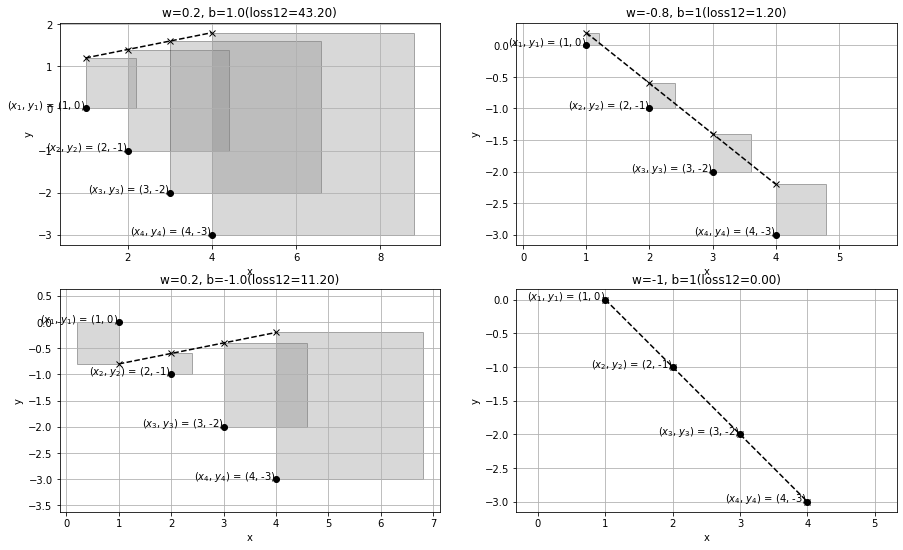

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def loss12(w, b, x, y):
  return np.sum(np.square(w*x + b - y))

def visualize12(w, b, x_train, y_train, loss):
  loss_name = loss.__name__
  plt.plot(x_train, y_train, 'ok')
  plt.plot(x_train, w * x_train + b, '--kx')
  [plt.text(x, y, '($x_{0}$, $y_{0}$) = ({1}, {2})'.format(k, x, y),
           horizontalalignment='right') 
           for k, (x, y) in enumerate(zip(x_train, y_train), 1)]
  currentAxis = plt.gca()
  for xx, yy in zip(x_train, y_train):
    currentAxis.add_patch(Rectangle((xx, yy), 
                                    (w * xx + b - yy),
                                    (w * xx + b - yy),
                                    alpha= 0.3, facecolor='gray',
                                    edgecolor='k'))
    
  plt.grid()
  plt.axis('equal')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title("w={}, b={}({}={:1.2f})".format(w, b, loss_name, loss(w, b, x_train, y_train)))


x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
visualize12(0.2, 1.0, x_train, y_train, loss12)
plt.subplot(2, 2, 2)
visualize12(-0.8, 1, x_train, y_train, loss12)
plt.subplot(2, 2, 3)
visualize12(0.2, -1.0, x_train, y_train, loss12)
plt.subplot(2, 2, 4)
visualize12(-1, 1, x_train, y_train, loss12)
plt.show()

###### 절댓값의 합을 이용한 선형회귀

$$ \min_{w, b} \sum_{i=1}^4 \left\vert wx_i +b -y \right\vert $$

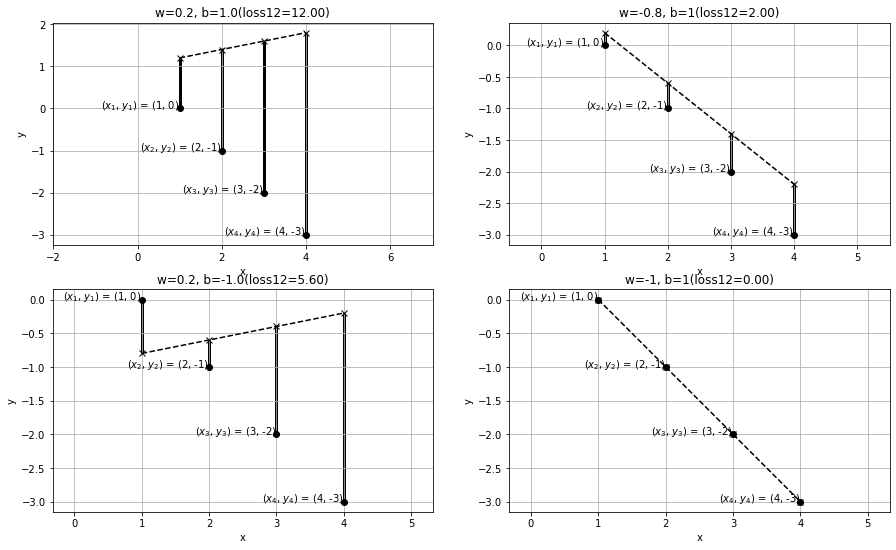

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def loss12(w, b, x, y):
  return np.sum(np.abs(w*x + b - y))

def visualize12(w, b, x_train, y_train, loss):
  loss_name = loss.__name__
  plt.plot(x_train, y_train, 'ok')
  plt.plot(x_train, w * x_train + b, '--kx')
  [plt.text(x, y, '($x_{0}$, $y_{0}$) = ({1}, {2})'.format(k, x, y),
           horizontalalignment='right') 
           for k, (x, y) in enumerate(zip(x_train, y_train), 1)]
  currentAxis = plt.gca()
  for xx, yy in zip(x_train, y_train):
    currentAxis.add_patch(Rectangle((xx, yy), 0,
                                    w * xx + b - yy,
                                    alpha= 1.0, facecolor='k',
                                    edgecolor='k',
                                    linewidth=3))
    
  plt.grid()
  plt.axis('equal')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title("w={}, b={}({}={:1.2f})".format(w, b, loss_name, loss(w, b, x_train, y_train)))


x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
visualize12(0.2, 1.0, x_train, y_train, loss12)
plt.subplot(2, 2, 2)
visualize12(-0.8, 1, x_train, y_train, loss12)
plt.subplot(2, 2, 3)
visualize12(0.2, -1.0, x_train, y_train, loss12)
plt.subplot(2, 2, 4)
visualize12(-1, 1, x_train, y_train, loss12)
plt.show()

### Chapter 6
### 고전 수치최적화 알고리즘


#### 수치최적화 알고리즘이 필요한 이유

#### 수치최적화 알고리즘의 패턴

#### 그래디언트 디센트 (Gradient Decent)
경사하강법

##### 예제로 배우는 그래디언트 디센트

###### 예제 1

$$\min_{x} f(x) = x^2 - 4x + 6$$

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

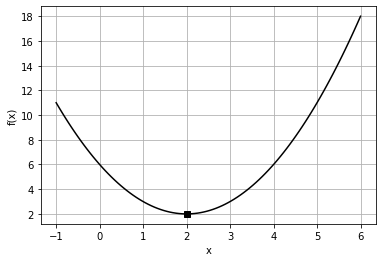

In [ ]:
f = lambda x : x**2 - 4*x + 6 # 함수
x = np.linspace(-1, 6, 100) # 정의역 (domain)
y = f(x) #함수 계산

# 함수 그래프 그리기

plt.plot(x, y, 'k-')
plt.plot(2, 2, 'sk') # 최솟값 위치 표시
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Gradient Decent 방법의 코드

$$f^\prime(x) = 2x - 4$$

In [ ]:
grad_f = lambda x : 2*x - 4 # 그래디언트

x0 = 0.0 # 초기의 값
epochs = 10 # 반복횟수
learning_rate = 0.25 # 학습률

print("step\tx\tf(x)")
print("{:02d}\t{:6.5f}\t{:6.5f}".format(0, x0, f(x0)))
for i in range(epochs):
  x1 = x0 - learning_rate * grad_f(x0) # 알고리즘
  x0 = x1 # Update
  print("{:02d}\t{:6.5f}\t{:6.5f}".format(i+1, x0, f(x0)))

step	x	f(x)
00	0.00000	6.00000
01	1.00000	3.00000
02	1.50000	2.25000
03	1.75000	2.06250
04	1.87500	2.01562
05	1.93750	2.00391
06	1.96875	2.00098
07	1.98438	2.00024
08	1.99219	2.00006
09	1.99609	2.00002
10	1.99805	2.00000


###### 여담
아래 코드를 실행하였을 때, 만약 오류가 생긴다?
그럼 책 만든 사람의 github 가서 일부 코드를 다운 받아야 함.
아래 링크 가서 찾아서 다운받으면 됨. \

작가 Github 링크 : https://github.com/DNRY/dlopt \
PART2-Chapter 6 링크 : https://github.com/DNRY/dlopt/blob/master/notebooks/CH06.ipynb

*뻘짓 30분 정도 하고 찾음.* 😧

In [ ]:
def steepest_descent(func, grad_func, x0, learning_rate=0.01, MaxIter=10, verbose=True):
    paths = []
    for i in range(MaxIter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return(x0, func(x0), np.array(paths))

000 : 4.200, 6.84E+00
001 : -0.420, 7.86E+00
002 : 4.662, 9.09E+00
003 : -0.928, 1.06E+01
004 : 5.221, 1.24E+01
005 : -1.543, 1.46E+01
006 : 5.897, 1.72E+01
007 : -2.287, 2.04E+01
008 : 6.716, 2.42E+01


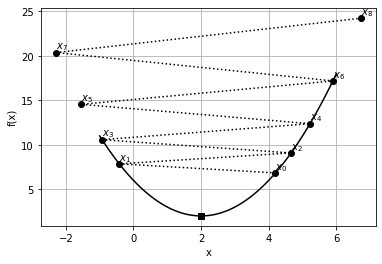

In [ ]:
xopt, fopt, paths = steepest_descent(f, grad_f, 0.0, learning_rate=1.05, MaxIter=9)

plt.plot(x, y, 'k-') # 그래프
plt.plot(2, 2, 'sk') # 정답
plt.plot(paths, f(paths), 'ko:') # 추정치의 경로
for k, point in enumerate(paths):
  #위치 표시
  plt.text(point, f(point), '$x_{0}$'.format(k),
           verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

낮은 학습률을 설정한 경우

000 : 0.200, 5.24E+00
001 : 0.380, 4.62E+00
002 : 0.542, 4.13E+00
003 : 0.688, 3.72E+00
004 : 0.819, 3.39E+00
005 : 0.937, 3.13E+00
006 : 1.043, 2.92E+00
007 : 1.139, 2.74E+00
008 : 1.225, 2.60E+00


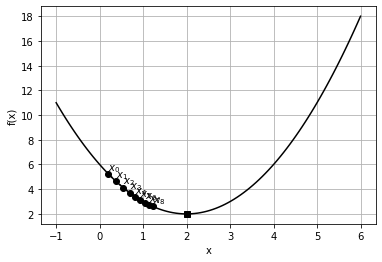

In [ ]:
xopt, fopt, paths = steepest_descent(f, grad_f, 0.0, learning_rate=0.05, MaxIter=9)

plt.plot(x, y, 'k-') # 그래프
plt.plot(2, 2, 'sk') # 정답
plt.plot(paths, f(paths), 'ko:') # 추정치의 경로
for k, point in enumerate(paths):
  #위치 표시
  plt.text(point, f(point), '$x_{0}$'.format(k),
           verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

###### 예제 2

$$\min_{x, y}f(x, y) = 3(x-2)^2 + (y-2)^2$$

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

def contour(f, x, y, level = np.logspace(0, 5, 35)):
	ax.contour(x, y, f(x,y), levels=level, norm=LogNorm(), cmap=plt.cm.jet)

	ax.set_xlabel('$x$')
	ax.set_ylabel('$y$')

	# ax.set_xlim((xmin, xmax))
	# ax.set_ylim((ymin, ymax))

	plt.show()

def contour_with_quiver(f, x, y, grad_x, grad_y, norm=LogNorm(), level = np.logspace(0, 5, 35),
	minima=None):
	dz_dx = grad_x(x,y)
	dz_dy = grad_y(x,y)

	fig, ax = plt.subplots()

	ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)
	if minima is not None:
		ax.plot(*minima, '*r', markersize=18)
	ax.quiver(x, y, -dz_dx, -dz_dy, alpha=.5)
	ax.set_xlabel('$a$')
	ax.set_ylabel('$b$')
	plt.axis('equal')

	# ax.set_xlim((xmin, xmax))
	# ax.set_ylim((ymin, ymax))

	plt.show()

def surf(f, x, y, norm=LogNorm(), minima=None):
	ax = plt.axes(projection='3d', elev=50, azim=-50)

	ax.plot_surface(x, y, f(x,y), norm=norm, rstride=1, cstride=1,
	                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

	if minima is not None:
		ax.plot(*minima, f(*minima), '*r', markersize=15)

	ax.set_xlabel('$x$')
	ax.set_ylabel('$y$')
	ax.set_zlabel('$z$')

	plt.show()

def contour_with_path(f, x, y, paths, norm=LogNorm(), level=np.logspace(0, 5, 35), minima=None):
	fig, ax = plt.subplots()

	ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)
	ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
	if minima is not None:
		ax.plot(*minima, 'r*', markersize=18)

	ax.set_xlabel('$a$')
	ax.set_ylabel('$b$')
	plt.axis('equal')

	# ax.set_xlim((xmin, xmax))
	# ax.set_ylim((ymin, ymax))

	plt.show()

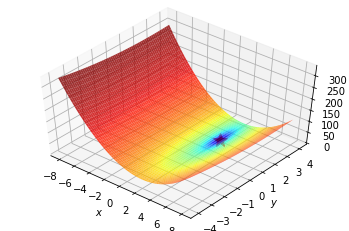

In [ ]:
f = lambda x, y : 3*(x-2)**2 + (y-2)**2 #손실함수

#정의역
xmin, xmax, xstep = -8.0, 8.0, 0.25
ymin, ymax, ystep = -4.0, 4.0, 0.125

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                   np.arange(ymin, ymax + ystep, ystep))

minima_ = np.array([[2], [2]]) # 정답
surf(f, x, y, minima=minima_) # 그래프

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Log scale: values of z <= 0 have been masked


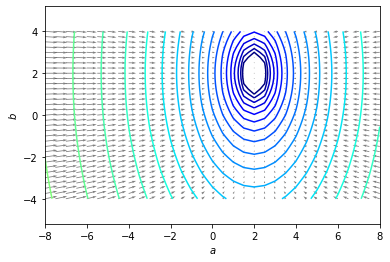

In [ ]:
grad_f_x = lambda x, y: 6 * (x-2)
grad_f_y = lambda x, y: 2 * (y-2)

# 정의역
xmin, xmax, xstep = -8.0, 8.0, .5
ymin, ymax, ystep = -4.0, 4.0, .25
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

# 그래프
contour_with_quiver(f, x, y, grad_f_x, grad_f_y)

In [ ]:
f = lambda x,y : 3*(x-2)**2 + (y-2)**2 # 손실함수
grad_f_x = lambda x, y: 6 * (x-2) # 손실함수의 x미분
grad_f_y = lambda x, y: 2 * (y-2) # 손실함수의 y미분

x0 = np.array([-2., -2.]) # 초깃값
MaxIter = 10 # 반복 횟수
learning_rate = 0.25 # 학습률
print("step\t(x,y)\t\tf(x)")
print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(0, x0[0], x0[1], f(*x0)))
for i in range(MaxIter):
    grad = np.array([grad_f_x(*x0), grad_f_y(*x0)]) # 그래디언트 계산
    x1 = x0 - learning_rate * grad # 업데이트
    x0 = x1
    print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(i+1, x0[0], x0[1], f(*x0)))

step	(x,y)		f(x)
00	(-2.0000,-2.0000) : 64.0000
01	(4.0000,0.0000) : 16.0000
02	(1.0000,1.0000) : 4.0000
03	(2.5000,1.5000) : 1.0000
04	(1.7500,1.7500) : 0.2500
05	(2.1250,1.8750) : 0.0625
06	(1.9375,1.9375) : 0.0156
07	(2.0312,1.9688) : 0.0039
08	(1.9844,1.9844) : 0.0010
09	(2.0078,1.9922) : 0.0002
10	(1.9961,1.9961) : 0.0001


In [ ]:
def steepest_descent_twod(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        fval = func(*x0)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: Log scale: values of z <= 0 have been masked


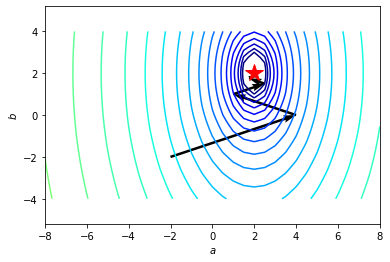

In [ ]:
x0 = np.array([-2., -2.]) # 초깃값
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f, x, y, paths, minima=minima_)

##### 그래디언트 디센트 방법의 한계점



###### 전역 최솟값과 국소 최솟값

Gradient Descent로 얻은 추정치는 국소 최솟값(Local minimun)이라는 단점이 있음.
허나, 손실함수가 컨벡스 성질을 갖고 있는 경우에는 국소 최솟값이 항상 전역 최솟값이라는 수학적 증명이 있음.

$\color{yellow}{컨벡스}$의 수학적 의미는 공간 내 임의의 두 점을 선택했을 때 두 점을 이은 선은 반드시 해당 공간에 포함된다는 성질을 의미

그러나, 실제 즉 실무에서는 컨벡스 성질을 만족하는 손실함수는 거의 없음...

이런 한계점은 Gradient Descent에만 있는 게 아님. \
모든 수치최적화 알고리즘은 $\color{yellow}{항상}$ 전역 최솟값을 알 수 없음.



###### 초깃값 민감성

같은 학습률을 설정해도 초깃값에 따라서 수렴하는 지점이 다름.

In [ ]:
import numpy as np
import tensorflow as tf

000 : 2.851, 8.17E-01
001 : 3.462, -1.09E+00
002 : 4.363, -4.10E+00
003 : 4.971, -4.81E+00
004 : 4.895, -4.81E+00
005 : 4.919, -4.81E+00
000 : 1.224, 1.15E+00
001 : 0.885, 6.85E-01
002 : 0.551, 2.89E-01
003 : 0.303, 9.04E-02
004 : 0.156, 2.43E-02
005 : 0.079, 6.19E-03


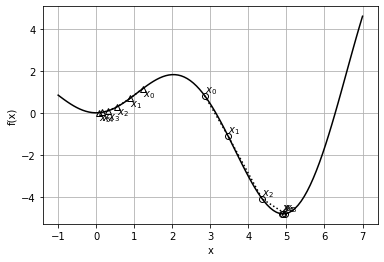

In [ ]:
f = lambda x: x * np.sin(x)
x = np.linspace(-1, 7, 100) # 정의역(domain)
y = f(x) # 함수 계산
grad_f = lambda x: np.sin(x) + x * np.cos(x) # 손실함수의 x미분


x0 = 2.5 # 초깃값1
xopt1, _, paths1 = steepest_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)

x0 = 1.5 # 초깃값2
xopt2, _, paths2 = steepest_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)

# 그래프
plt.plot(x, y, 'k-')
plt.plot(paths1, f(paths1), 'ko:', markerfacecolor='none')
plt.plot(paths2, f(paths2), 'k^:', markerfacecolor='none')
for k, point in enumerate(paths1):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
for k, point in enumerate(paths2):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='top')
    
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

위의 코드는 2가지 초깃값을 사용.  
학습률과 반복 횟수 모두 같은 값을 사용해도 다른 값으로 수렴함.  

위의 그래프는 초깃값 2.5로 설정한 결과를 원으로,  
초깃값 1.5로 설정한 결과를 세모로 표시한 것임.

초깃값이 2.5인 경우는 전역 최솟값으로 수렴하지만, 1.5인 경우는  
국소 초깃값으로 수렴하는 것을 확인할 수 있음.

구슬을 놓는 위치에 따라서 어느 골짜기로 내려갈지 달라지는 것과 같은 원리.


이번엔 초깃값에 따라 수렴하는 위치가 달라지는 2차원 예제를 소개함.  
삼각함수로 이루어진 손실함수.

$$\min_{x}f(x, y) = \sin(2πx)\sin(2πy)$$

초깃값은 (0, 0.01)과 (0, -0.01).

In [ ]:
import numpy as np
def steepest_descent_2d(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25, verbose=True):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        fval = func(*x0)
        if verbose:
            print(i, x0, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

def newton_descent_2d(func, gradx, grady, hessian, x0, MaxIter=10, learning_rate=1.0, verbose=True):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        hess = hessian(x0[0], x0[1])
        x1 = x0 - learning_rate * np.linalg.solve(hess, grad)
        fval = func(*x0)
        if verbose:
            print(i, x0, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

0 [0.   0.01] 0.0
1 [-0.00986798  0.01      ] -0.0009736145195259344
2 [-0.01973122  0.01973294] -0.003837860291047942
3 [-0.039157    0.03915702] -0.015056603776508653
4 [-0.07741473  0.07741473] -0.05799189153966888
5 [-0.15084258  0.15084258] -0.20825298255593722
6 [-0.27840969  0.27840969] -0.5887784369911025
7 [-0.43299341  0.43299341] -0.9563373303803551
8 [-0.49718979  0.49718979] -0.9999220591321399
9 [-0.49996321  0.49996321] -0.9999999866429123


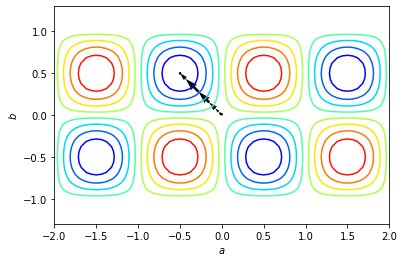

0 [ 0.   -0.01] -0.0
1 [ 0.00986798 -0.01      ] -0.0009736145195259344
2 [ 0.01973122 -0.01973294] -0.003837860291047942
3 [ 0.039157   -0.03915702] -0.015056603776508653
4 [ 0.07741473 -0.07741473] -0.05799189153966888
5 [ 0.15084258 -0.15084258] -0.20825298255593722
6 [ 0.27840969 -0.27840969] -0.5887784369911025
7 [ 0.43299341 -0.43299341] -0.9563373303803551
8 [ 0.49718979 -0.49718979] -0.9999220591321399
9 [ 0.49996321 -0.49996321] -0.9999999866429123


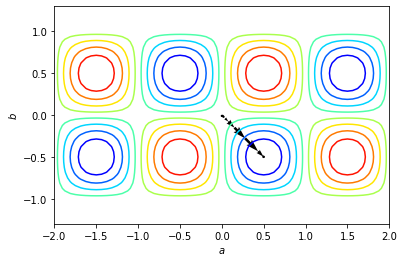

In [ ]:
f = lambda x,y : np.sin(np.pi*x) * np.sin(np.pi*y)
xmin, xmax, xstep = -2.0, 2.0, .0625
ymin, ymax, ystep = -1.0, 1.0, .0625
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

grad_f_x = lambda x, y: np.pi*np.cos(np.pi*x) * np.sin(np.pi*y)
grad_f_y = lambda x, y: np.pi * np.sin(np.pi*x) * np.cos(np.pi*y)

learning_rate = 0.01

x0 = np.array([0, 0.01]) # 초깃값
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, learning_rate=0.1)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))

x0 = np.array([0, -0.01]) # 초깃값
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, learning_rate=0.1)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))

(0.5, -0.5)로 수렴한 것을 확인할 수 있었음.
이처럼 초깃값에 매우 민감하게 반흥하는 손실 함수도 있음.

일반적으로 초깃값은 전역 최솟값과 가까울수록 좋음. 그러나 전역 최솟값을 미리 알고 있다면, 이것을 하는 이유가 없음...

딥러닝에서도 초깃값은 중요.  
초깃값에 따라 학습속도가 현격하게 달라지는 경우가 있음.


###### 학습률 민감성

학습률이 그래디언트 디센트 방법의 수렴 속도에 미치는 영향은 매우 큼.  
보통은 다음과 같이 안전하게 학습률을 아주 작게 설정함.

000 : 2.570, 1.39E+00
001 : 2.651, 1.25E+00
002 : 2.745, 1.06E+00
003 : 2.852, 8.15E-01
004 : 2.974, 4.95E-01
005 : 3.113, 9.02E-02


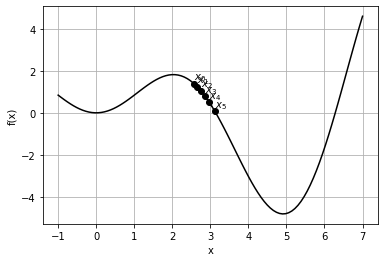

000 : 3.904, -2.70E+00
001 : 7.418, 6.72E+00
002 : 3.378, -7.91E-01
003 : 6.896, 3.97E+00
004 : 0.679, 4.27E-01
005 : -0.477, 2.19E-01


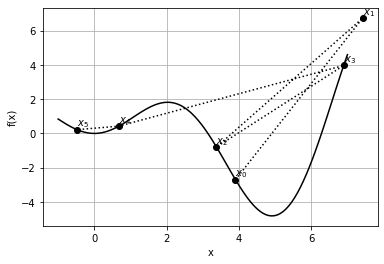

000 : 2.851, 8.17E-01
001 : 3.462, -1.09E+00
002 : 4.363, -4.10E+00
003 : 4.971, -4.81E+00
004 : 4.895, -4.81E+00
005 : 4.919, -4.81E+00


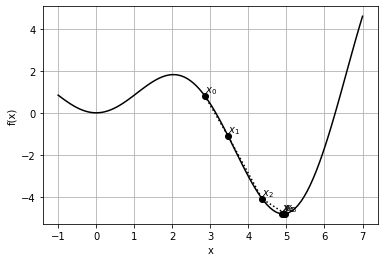

In [ ]:
f = lambda x: x * np.sin(x)
x = np.linspace(-1, 7, 100) # 정의역(domain)
y = f(x) # 함수 계산
grad_f = lambda x: np.sin(x) + x * np.cos(x) # 손실함수의 x미분

x0 = 2.5 # 초깃값
xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=0.05, MaxIter=6)

plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'ko:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=1.00, MaxIter=6)
plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'ko:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

xopt, fopt, paths = steepest_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)
plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'ko:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

1. 첫번째 그래프   
학습률을 0.05로 설정한 경우에는 추정치가 수렴하는 속도가 매우 느림.
2. 두번째 그래프  
학습률을 1.0으로 설정한 경우에는 학습률이 너무 커서 추정치가 수렴하지 않고 발산하는 것을 확인 가능.
3. 세번째 그래프  
 0.05와 1.0 사이의 적정한 값을 실험적으로 찾아야 함. 그래서 학습률을 0.25로 하고 돌려보았음.

#### 그래디언트 디센트를 사용한 선형회귀 모델 학습

##### 선형회귀 문제 수식 소개

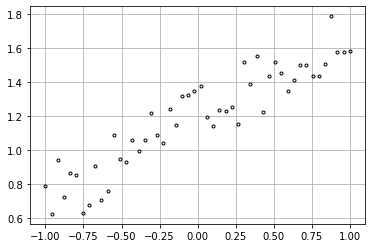

In [ ]:
# Target function
np.random.seed(320)
x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
plt.plot(x_train, y_train, '.k', markerfacecolor='none')
plt.grid()
plt.show()

임의의 50개 좌표 데이터가 있음.   
해당 좌표 데이터를 가장 잘 표현하는 직선의 방정식을 찾는 것이 선형회귀 문제의 목적.  

가장 먼저 데이터를 가장 잘 표현한다는 것을 수학적으로 표현해야 함.

$$min_{a, b} E (a, b) = {1 \over N} \sum_{i=1}^N \left\vert ax_i + b - y_i \right\vert ^2 $$

N은 데이터 갯수를 나타냄. 위의 경우에는 N=50이 됨.   
a는 직선의 기울기.  
b는 y절편.  
절대값 안에 있는 $ax_i + b$는 선형회귀 모델의 방정식을 뜻함.
y_i는 데이터 값을 뜻함.

즉 50개의 $ax_i + b$와 $y_i$의 차이의 제곱 평균을 의미함.

###### 그래디언트 디센트 방법 적용

방법을 적용하려면 가장 먼저 그래디언트를 구해야 함.

연쇄 법칙(Chain rule)을 사용하면 다음 수식으로 전개할 수 있음.

$${∂E \over ∂a} = {2 \over N}\sum_{i=1}^N x_i \left( ax_i + b - y_i \right)
= {2 \over N}\sum_{i=1}^N x_i e_i$$

$${∂E \over ∂b} =  {2 \over N}\sum_{i=1}^N x_i \left( ax_i + b - y_i \right)
= {2 \over N}\sum_{i=1}^N e_i $$

$e_i$는 i번째 데이터의 오차인 $ax_i + b - y_i$임. \
즉 $e_i = ax_i + b - y_i$

손실함수와 손실함수의 그래디언트를 파이썬 함수로 선언하는 것은 다음과 같음.

In [ ]:
# 손실함수
def loss(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        val += 0.5 * ( a * x_train[i] + b - y_train[i] )**2
    return val / N

# 손실함수의 a방향 미분
def loss_grad_a(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        er = a * x_train[i] + b - y_train[i]
        val += er * x_train[i]
    return val / N

# 손실함수의 b방향 미분
def loss_grad_b(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        er = a * x_train[i] + b - y_train[i]
        val += er
    return val / N

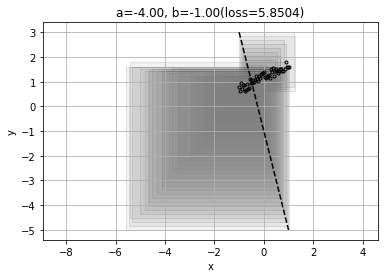

In [ ]:
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = loss.__name__
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, w * x_train + b, '--k')
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        w * xx + b - yy, w * xx + b - yy,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f}({}={:5.4f})".format(w, b, loss_name, loss(w,b)))

visualize_l2(-4, -1, x_train, y_train, loss)
plt.show()

손실함수가 오차 제곱의 평균임.

한번의 크기가 오차($e_i$)의 크기인 정사각형으로 시각화를 한 그래프임
위의 그래프가 진하게 보이는 이유는 정사각형이 여러개가 겹쳐서 그런거임.

손실함수를 작게 만드는 추정치를 찾을수록 표시된 정사각형들의 넓이 평균이 작아지는 것을 시각적으로 확인할 수 있음.


그래디언트 디센트 방법으로 찾아야 할 추정치가 총 2개이므로 2차원 최적화 문제임.

2차원 버젼의 그래디언트 디센트 알고리즘을 다음 함수로 표현해보았음.

In [ ]:
def steepest_descent_twod(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        fval = func(*x0)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

In [ ]:
w0 = np.array([-4, -1]) # 초깃값
wopt, fopt, paths, fval_paths = steepest_descent_twod(loss, loss_grad_a, loss_grad_b, w0, learning_rate=0.5, MaxIter=30)

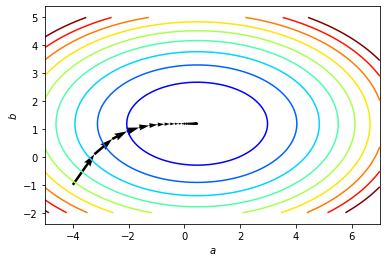

In [ ]:
a = np.linspace(-5, 7, 101)
b = np.linspace(-2, 5, 101)
A, B = np.meshgrid(a,b)
LOSSW = A * 0
for i in range(LOSSW.shape[0]):
    for j in range(LOSSW.shape[1]):
        aij, bij = A[i,j], B[i,j]
        LOSSW[i,j] = loss(aij, bij)

contour_with_path(loss, A, B, paths, norm=None, level=np.linspace(0, 10, 10))

일반적으로는 손실함수를 컨투어(위 그림)로 그릴수 없음.
위의 것은 추정치가 2차원이기 때문에 모든 컨투러을 그려서 추정치가 적절한 값으로 수렴하고 있는 지를 눈으로 확인 가능.

3차원이 되면 시각화하기가 어렵고, 4차원 이상은 시각화가 불가능함.

딥러닝에서 사용되는 모델은 100만 차원이 넘어가는 경우도 많음.  
이런 경우에는 시각화가 불가능하므로 매 반복마다 손실함수의 값을 추적하는 그래프를 그리는 법뿐임.



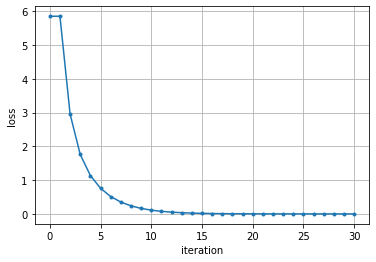

In [ ]:
plt.plot(fval_paths, '.-')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

아래 코드는 추정치가 업데이트되는 과정을 그린 것임.

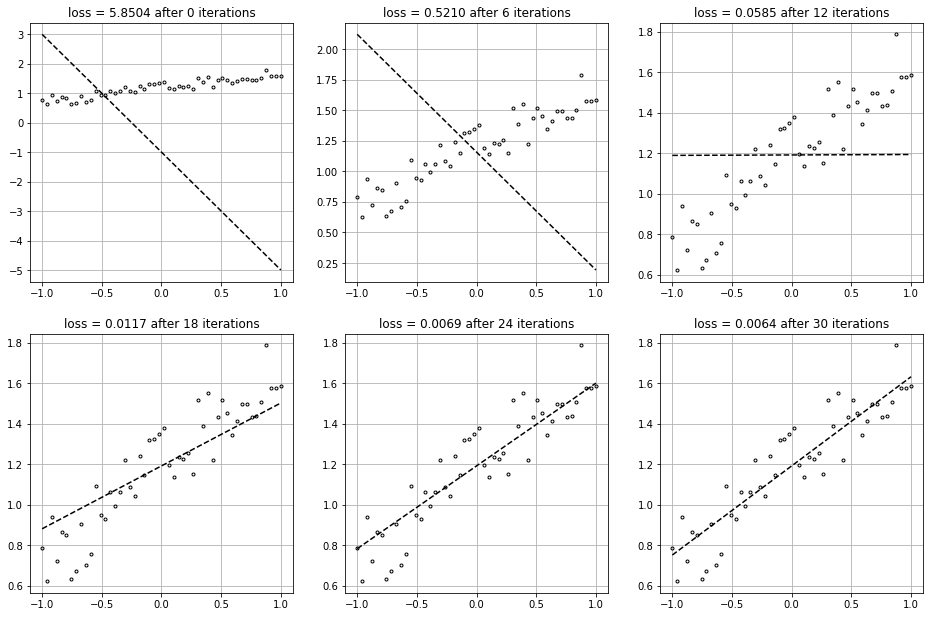

In [ ]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, paths[0, i] * x_train + paths[1, i], 'k--')
    plt.grid()
    plt.title('loss = {:5.4f} after {:d} iterations'.format(fval_paths[i], i))
    k+=1
plt.show()

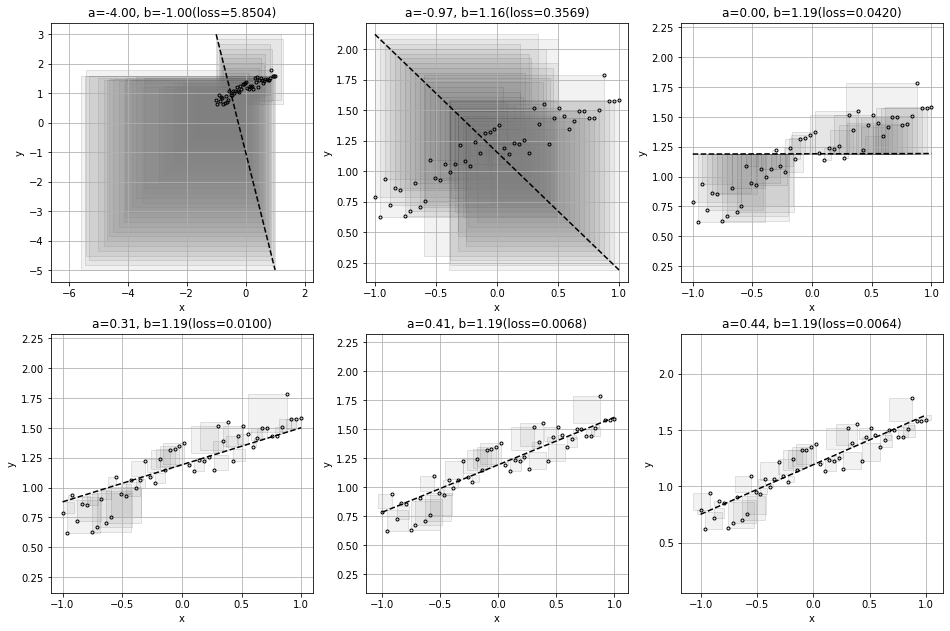

In [ ]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    ai, bi = paths[0:2, i]
    visualize_l2(ai, bi, x_train, y_train, loss)
    k+=1
plt.show()

30번을 반복하여 얻어진 직선의 방정식은 다음과 같음.

In [ ]:
# 손실함수
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ( w[0] * x_set[i] + w[1] - y_set[i] )**2
    return val / N

# 손실함수의 그래디언트
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w)) # 그래디언트
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [ ]:
def steepest_descent_nd(func, grad_func, w0, x_set, y_set, MaxIter=10, learning_rate=0.25):
    paths = [w0]
    fval_paths = [func(w0, x_set, y_set)]
    for i in range(MaxIter):
        grad = grad_func(w0, x_set, y_set)
        w1 = w0 - learning_rate * grad
        fval = func(w0, x_set, y_set)
        w0 = w1
        paths.append(w0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return (w0, fval, paths, fval_paths)

In [ ]:
w0 = np.array([-4, -1])
wopt, fopt, paths, fval_paths = steepest_descent_nd(loss, loss_grad, w0,
                                                    x_train, y_train, learning_rate=0.5, MaxIter=30)
print(wopt)

[0.44031858 1.19143584]


$$y = 0.44x + 1.19$$



한계점

그래디언트 디센트 방법(경사하강법)

이 방법으로 문제를 풀기 위해서는 먼저 그래디언트를 구해야 함.

$$$$

위의 식을 보면 알 수 있듯, 총 N개의 값에 대해 덧셈을 해야함.   
수십만개가 훌쩍 넘어가는 데이터를 이용해 학습하는 경우에는 계산 시간이 매우 오래 걸리게 됨.   

데이터가 이렇게 많으면 메모리에 한번에 올리는 것도 불가능하여 구현도 어려워짐.

이러한 한계점을 극복하는 방법과 그에 특화된 알고리즘은 다음에 서술함.

### Chapter 7
### 딥러닝을 위한 수치최적화 알고리즘

#### 스토캐스틱 방법(Stochastic method)

이 방법은 앞서 말한 그래디언트 디센트의 한계점을 극복한 방법이다.  
수식은 다음과 같다.
$$VE = {2 \over N}\sum_{i=1}^N \begin{bmatrix} x_i \\
1 \end{bmatrix} (ax_i + b - y_i)$$

스토캐스틱 방법의 아이디어는 최소의 데이터 갯수로 손실함수의 그래디언트를 최대한 정확하게 계산하는 것.

즉 N개의 데이터 중, m개만을 임의로 추출해서 그래디언트를 계산하는 데 사용하는 방법론임.

$$VE = {2 \over N}\sum_{i=1}^N(ax_i + b - y)\begin{bmatrix} x_i \\
1\end{bmatrix} \\ = {2 \over m}\sum_{i=1}^m(ax_i + b - y)\begin{bmatrix} x_i \\
1\end{bmatrix} $$

비록 가장 정확한 그래디언트의 값은 아니지만, 적당한 m 값만 찾는 다면 빠른 속도로 그래디언트를 추정할 수 있어서 딥러닝 학습속도를 크게 향상 시킬 수 있음.

스토캐스틱 방법들은 일정한 패턴을 갖고 있음. 그것은 다음과 같음.

1. 초깃값을 설정.
2. 전체 데이터를 임의로 섞기.
3. 전체 데이터에서 개수가 m개인 부분집합(배치, batch)를 만들기.
4. 각 부분집합마다 다음을 반복.
   1. 부분집합으로 그래디언트를 계산.
   2. 계산한 그래디언트로 학습방향을 설정.
   3. 학습률 설정.
   4. 파라미터 추정치를 업데이트
5. 만들어진 부분집합을 모두 사용한 후 다시 4번을 epoch만큼 반복.


스토캐스틱 방법을 적용할 때, 정해야 할 변수는 2가지가 있음.  
반복하는 횟수인 epoch임.   
m은 주로 배치 크기(batch size)라고 불림.   
배치 크기가 클수록 그래디언트의 계산의 정확도는 높아짐. 계산 속도는 느려짐.   
그러므로 적당한 배치 크기를 설정하는 것이 중요.



그래디언트를 계산하기 위해서 모든 데이터를 사용하는 것을 결정론적 방법(Deterministic method)이라 함.

그래디언트를 계산하기 위해 일부분의 데이터를 사용하는 것을 스토캐스틱(Stochastic method) 방법이라고 함.

결정론적 방법 -> 배치 방법/오프라인

스토캐스틱 방법 -> 미니 배치 방법/온라인

배치 크기는 스토캐스틱 방법(미니 배치 방법)에서만 설정함.

결정론적 방법(배치 방법)은 전체 데이터를 사용하니 배치 크기를 설정할 필요가 없음.



#### 스토캐스틱 방법의 코드 구현 패턴

In [ ]:
import numpy as np
np.random.seed(320)
x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

In [ ]:
# 손실함수
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ( w[0] * x_set[i] + w[1] - y_set[i] )**2
    return val / N

#손실함수의 그래디언트
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

손실함수의 그래디언트에서 2번째, 3번째 입력값인 x_set, y_set이 중요함.  
이 입력값에 배치가 들어감.

배치 크기를 다르게 할때마다 손실함수의 그래디언트를 매번 수정하지 않게 하기 위한   
입력값들임.

스토캐스틱 방법에서 그래디언트를 계산할 때, x_set과 y_set에는 m개의 데이터가 들어감.

In [ ]:
idx = np.arange(len(x_train))
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[32 17 47 33  1  7 23 19 21 40  3 14 18  0  4 12 42 41 25 10  2 36 31  6
 16 24 11 22 45 46 49 15 38 48  8 37 30  9 35 13 28 34 29 27 39 26 20 44
  5 43]


np.random.shuffle() 을 사용할 때 반환값(return)이 없는 것에 주의.

In [ ]:
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [ ]:
for x_batch, y_batch in generate_batches(3, x_train, y_train):
    print(x_batch, y_batch)

[-1.         -0.95918367 -0.91836735] [0.78574159 0.62279481 0.93814004]
[-0.87755102 -0.83673469 -0.79591837] [0.72150122 0.86499739 0.85115953]
[-0.75510204 -0.71428571 -0.67346939] [0.63109945 0.67370079 0.90634104]
[-0.63265306 -0.59183673 -0.55102041] [0.7042696  0.75735387 1.09007932]
[-0.51020408 -0.46938776 -0.42857143] [0.94743363 0.92818283 1.06045081]
[-0.3877551  -0.34693878 -0.30612245] [0.99368385 1.06051158 1.21971149]
[-0.26530612 -0.2244898  -0.18367347] [1.08782982 1.04038442 1.23899142]
[-0.14285714 -0.10204082 -0.06122449] [1.14773768 1.31747766 1.32483893]
[-0.02040816  0.02040816  0.06122449] [1.34687377 1.37697682 1.1934449 ]
[0.10204082 0.14285714 0.18367347] [1.13853236 1.2355545  1.22705389]
[0.2244898  0.26530612 0.30612245] [1.25411949 1.1516581  1.51647387]
[0.34693878 0.3877551  0.42857143] [1.38753167 1.55110038 1.22031966]
[0.46938776 0.51020408 0.55102041] [1.43410404 1.51725848 1.45144753]
[0.59183673 0.63265306 0.67346939] [1.34402611 1.41322458 1.497

#### 탐색 방향 기반 알고리즘

그래디언트 디센트 계열의 방법에서 중요한 탐색 방향과 학습률 중   
탐색 방향에 집중하는 알고리즘임.

총 3가지의 알고리즘이 있음.

1. 스토캐스틱 그래디언트 디센트
2. 모멘팅 방법
3. 네스테로프 모멘팅 방법




##### 스토캐스틱 그래디언트 디센트 방법

앞서 설명한 스토캐스틱 처럼 전체 데이터가 아닌 일부 데이터만을 사용해 그래디언트를 계산하는 방법이고, 계산 방식은 일반 그래디언트 디센트 방법과 동일하다.

$$w^{(k+1)} = w^{(k)} - ɛ∇_w E(w^{(k)})$$

1. 초깃값 설정
2. 전체 데이터 임의로 셔플
3. 전체 데이터에서 개수가 m개인 부분집합(Batch)을 만듦.
4. 각 부분집합마다 다음을 반복
   1. 부분집합으로 그래디언트 계산
   2. 계산한 그래디언트의 반대방향을 탐색 방향으로 설정.
   3. 주어진 학습률($ɛ$)을 그대로 사용.
   4. 파라미터 추정치를 업데이트
5. 만들어진 부분집합을 모두 사용한 후 다시 4번 과정을 epoch 만큼 반복.


스토캐스틱 그래디언트 디센트 방법을 사용한 코드는 다음과 같음.

총 50개의 데이터, 배치 크기가 10개.

In [ ]:
# SGD
batch_size = 5 # 뱃치 크기
lr = 0.1 # 학습률
MaxEpochs = 10 # 반복 횟수

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0]) # 1) 초깃값
search_direction = np.zeros_like(w0)

# 2) 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정
        # 4)-4 파라미터 업데이트
        dw = lr * search_direction 
        w0 = w0 + dw
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))

00	[2.91035731 0.41600626]	1.3528
01	[2.16116443 0.91072736]	0.5508
02	[1.64213678 1.08506558]	0.2565
03	[1.28118721 1.14753552]	0.1258
04	[1.02969021 1.17062936]	0.0639
05	[0.85428891 1.17964522]	0.0341
06	[0.73190101 1.18347802]	0.0197
07	[0.64648362 1.18530124]	0.0128
08	[0.58686184 1.18627879]	0.0094
09	[0.54524313 1.18685894]	0.0078
10	[0.51619055 1.18722852]	0.0070


In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16./3, 3)

def contour_with_path(l, x, y, paths, norm=LogNorm(), level=np.logspace(0, 5, 35), minima=None):
    paths = np.array(paths).T
    fig, ax = plt.subplots(figsize=(7, 4))

    ax.contour(x, y, l, levels=level, norm=norm, cmap=plt.cm.jet)
    ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    if minima is not None:
        ax.plot(*minima, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    plt.show()
    
W0 = np.linspace(-5, 7, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

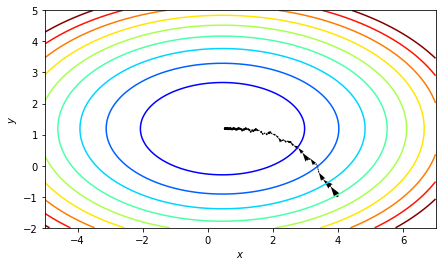

In [ ]:
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))

일반적인 그래디언트 디센트 방법과 비교한다면, 경로가 부드럽게 이어지지 않는 다는 것을 확인할 수 있음.

이것은 정확한 그래디언트를 구하지 못했기 때문.   
그러나 적은 데이터로 일정 수준 이상의 그래디언트를 계산할 수 있음으로써, 결국 손실함수의 최솟값을 얻을 수 있는 파라미터로 수렴하고 있음.

다음은 각 배치의 데이터만으로 계산한 손실함수의 그래프를 그려보는 코드임.

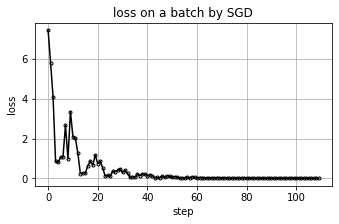

In [ ]:
plt.plot(batch_loss, '.-k', markerfacecolor='none')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss on a batch by SGD')
plt.show()

계속 감소하고 있지 않고, 증가하였다가 감소하는 경향을 보이는 데,

이것은 잘못된 게 아닌 모든 스토캐스틱 방법들이 비슷한 경향을 보이는 것이다.

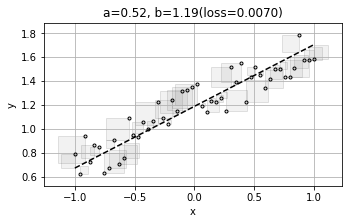

In [ ]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = 'loss'
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, w * x_train + b, '--k')
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        w * xx + b - yy, w * xx + b - yy,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f}(loss={:5.4f})".format(w, b, loss))
    
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

##### 모멘텀/네스테로프 방법

모멘텀과 네스테로프는 탐색 방향을 단순히 그래디언트의 반대 방향을 사용하는 것에서 한 단계 더 나아간 방법임.

국소 최솟값이 많은 손실함수에서 성능향상이 있을 수 있음.

그래디언트 디센트 방법의 경우 국소 최솟값에 수렴하게 되면 더는 빠져나갈 방법이 없음.

이유는 국소 최솟값 위치에서 탐색 방향의 반대인 그래디언트의 크기가 0이기 때문.


모멘텀 방법과 네스테로프 방법은 왼쪽의 국소 최솟값을 지나 오른쪽의 더 작은 손실함수 값을 갖는 국소 최솟값으로 갈 가능성을 높여줌.

쉬운 말로 국소 최솟값이 여러개 있는 그래프에서 전역 최솟값을 쉽게 찾을 수 있음.(효과적임)



전 단계 까지의 탐색 방향의 누적합에 일정한 상수 $a$를 곱한 후 현재의 그래디언트를 더해주는 방법.

모멘텀이 수식은 다음과 같음.

$$v^{(k+1)} = \alpha v^{(k)}- ɛ∇E(w^{(k)})$$

$$w^{(k+1)} = w^{(k)} + v^{(k+1)}$$

상수 $α$ 0과 1사이에 있는 상수이고, 이것의 역할은 오래전 단계의 탐색 방향을 작게 해주는 역할을 함.

네스테로프 방법은 $w^{(k)}$에서 구한 그래디언트 보다 정확한 값을 얻기 위해   
$w^{(k)} + αv^{(k)}$에서 그래디언트를 계산하는 것외엔 똑같음.

정리하자면 다음과 같음.

1. 초깃값과 $w^{(0)}$과 단기 누적속도 합 $v^{(0)} = 0$으로 초기화
2. 전체 데이터 임의로 셔플
3. 전체 데이터에서 개수가 m개인 부분집합(Batch)를 만듦.
4. 각 부분집합마다 다음을 반복함.
   1. 부분집합으로 그래디언트를 현재 위치($w^{(k)}$)에서 계산함.
   2. 주어진 학습률 $ϵ$을 그대로 사용.
   3. 탐색 방향을 $v^{(k+1)} = αv^{(k)} - ϵ∇E(w^{(k)})$로 설정.
   4. 파라미터 추정치를 업데이트. $w^{(k+1)} = w^{(k)} + v^{(k+1)}$
5. 만들어진 부분집합을 모두 사용한 후 다시 4번을 epoch만큼 반복.



In [ ]:
# Momentum
batch_size = 5 # 뱃치 크기
epsilon = 0.03 # 학습률
MaxEpochs = 10 # 반복 횟수

alpha = 0.9
velocity = np.zeros_like(w0)
paths = []
batch_loss = []

w0 = np.array([4.0, -1.0]) # 1) 초깃값

# 2) 데이터 셔플링 전과 동일

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        epsilon = epsilon # 4)-2 학습률 설정
        velocity = alpha * velocity - epsilon * grad # 4)-3 탐색 방향 설정
        dw = velocity # 4)-4 파라미터 업데이트
        w0 = w0 + dw
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))

00	[2.54087178 1.07028554]	0.7685
01	[0.72063777 1.93419136]	0.2945
02	[-0.05965121  1.115134  ]	0.0552
03	[-0.01191224  0.95949615]	0.0711
04	[0.29092257 1.26808092]	0.0140
05	[0.50165107 1.26688907]	0.0096
06	[0.54759617 1.15503489]	0.0085
07	[0.50399125 1.17225725]	0.0070
08	[0.45714916 1.20952484]	0.0066
09	[0.43965236 1.19863576]	0.0065
10	[0.4430227  1.18772071]	0.0064


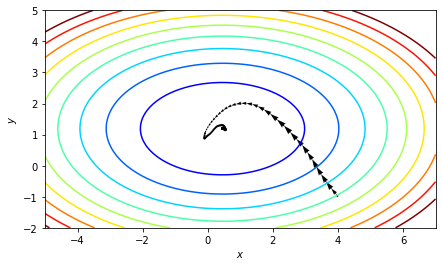

In [ ]:
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))

위는 모멘텀 기번으로 돌린 결과
네스테로프를 사용할 경우 수렴속도가 더 빠른 것을 확인 가능(그래디언트의 계산을 좀 더 정확하게 해주기 때문.)

#### 학습률 기반 알고리즘

학습률을 고정하지 않고 매번 적절한 학습률 계산을 하는 알고리즘을 적응형 알고리즘이라고 함.

많은 방법이 있지만, 이 책에서는 Adagrad, Rmsprop, Adam 알고리즘을 다룸.


##### 적응형 학습률 방법의 필요성

고정된 학습률(Fixed)

하나의 값(Scalar)

###### 학습률 고정에 의한 한계

학습률을 상수로 사용하는 그래디언트 디센트 방법은 학습률에 대해 매우 민감하였음.

이것을 해결하는 방법은 의외로 간단한데 큰 학습률로 시작을 하고 업데이트 된 파라미터 추정치로 손실함수값이 작아지지 않으면 업데이트를 하지 않고, 반대라면 손실함수 값이 작아질때까지 학습률의 크기를 절반으로 줄이면 됨.

이런 아이디어로 알고리즘을 만들면 초반에는 빠른 수렴 속도로 최적 파라미터의 추정치 근처로 수렴하다가 점점 학습률이 낮아져 안정적인 최적 파라미터로 정확하게 수렴할 수 있음.

이런 접근법을 적응형(Adaptive) 알고리즘이라고 함.

00	[0.59170786 1.24317207]	0.0110
01	[0.48223683 1.19754365]	0.0065
02	[0.47766067 1.19867973]	0.0065
03	[0.47756153 1.19850082]	0.0065
04	[0.4775554  1.19848961]	0.0065
05	[0.47755502 1.19848891]	0.0065
06	[0.47755499 1.19848886]	0.0065
07	[0.47755499 1.19848886]	0.0065
08	[0.47755499 1.19848886]	0.0065
09	[0.47755499 1.19848886]	0.0065
10	[0.47755499 1.19848886]	0.0065


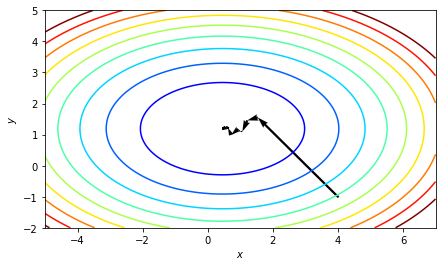

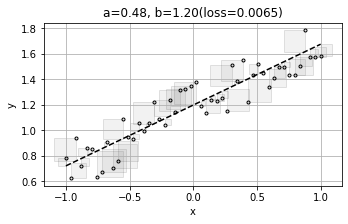

In [ ]:
# 적응형 알고리즘
batch_size = 5 # 뱃치 크기
lr = 2.0 # 학습률
MaxEpochs = 10 # 반복 횟수
search_direction = np.zeros_like(w0)

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0]) # 1) 초깃값

# 2) 데이터 셔플링은 생략합니다.

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정
        # 4)-4 파라미터 업데이트
        dw = lr * search_direction 
        w1 = w0 + dw
        # 적응형 알고리즘 예
        loss0, loss1 = loss(w0, x_train, y_train), loss(w1, x_train, y_train)
        if loss0 > loss1:
            w0 = w1
        else:
            lr = lr / 2
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[-0.30 2.36]	[1.00 -1.00]	2.7654
1-02	[2.02 2.45]	[1.39 1.56]	[-0.98 -0.55]	1.2226
1-03	[1.81 2.15]	[0.30 0.90]	[-0.21 -0.30]	0.7821
1-04	[1.55 1.78]	[0.40 1.17]	[-0.26 -0.37]	0.3872
1-05	[1.35 1.54]	[0.32 0.78]	[-0.21 -0.24]	0.2051
1-06	[1.28 1.43]	[0.10 0.37]	[-0.06 -0.11]	0.1530
1-07	[1.00 1.25]	[0.45 0.58]	[-0.28 -0.17]	0.0603
1-08	[0.92 1.26]	[0.13 -0.03]	[-0.08 0.01]	0.0463
1-09	[0.73 1.16]	[0.31 0.35]	[-0.19 -0.10]	0.0199
1-10	[0.64 1.21]	[0.14 -0.17]	[-0.09 0.05]	0.0127
2-01	[0.63 1.20]	[0.03 0.01]	[-0.02 -0.00]	0.0116
2-02	[0.57 1.20]	[0.10 0.02]	[-0.06 -0.01]	0.0086
2-03	[0.52 1.22]	[0.08 -0.07]	[-0.05 0.02]	0.0075
2-04	[0.53 1.23]	[-0.02 -0.02]	[0.01 0.01]	0.0079
2-05	[0.51 1.23]	[0.02 -0.00]	[-0.01 0.00]	0.0076
2-06	[0.51 1.22]	[0.00 0.02]	[-0.00 -0.01]	0.0073
2-07	[0.48 1.20]	[0.06 0.06]	[-0.04 -0.02]	0.0065
2-08	[0.50 1.19]	[-0.04 0.04]	[0.03 -0.01]	0.0068
2-09	[0.46 1.17]	[0.08 0.06]	[-0.05 -0.02]	0.0066
2-10	[0.

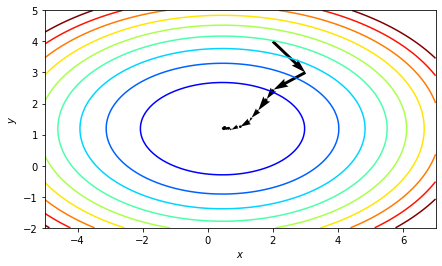

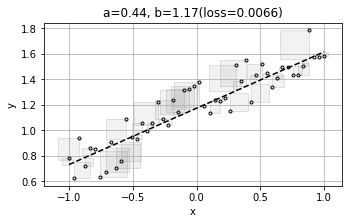

In [ ]:
# Adagrad
batch_size = 5 # 뱃치 크기
MaxEpochs = 2 # 반복 횟수

w0 = np.array([2.0, 4.0]) # 1) 초깃값

epsilon = 1.0
delta = 1E-7
r = np.zeros_like(w0)

paths = []
batch_loss = []

print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 생략

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정
        r = r  + grad * grad
        lr = epsilon / (delta + np.sqrt(r)) 
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1, 
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1
        
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[2.79 3.21]	[-0.30 2.36]	[0.79 -0.79]	2.9888
1-02	[2.02 2.72]	[1.24 1.79]	[-0.77 -0.49]	1.5922
1-03	[1.86 2.40]	[0.25 1.17]	[-0.16 -0.31]	1.0830
1-04	[1.57 2.04]	[0.46 1.44]	[-0.29 -0.36]	0.5848
1-05	[1.33 1.78]	[0.38 1.05]	[-0.24 -0.26]	0.3131
1-06	[1.26 1.62]	[0.11 0.61]	[-0.07 -0.16]	0.2115
1-07	[0.93 1.42]	[0.52 0.76]	[-0.33 -0.20]	0.0718
1-08	[0.88 1.38]	[0.07 0.16]	[-0.05 -0.04]	0.0555
1-09	[0.64 1.25]	[0.36 0.45]	[-0.24 -0.13]	0.0142
1-10	[0.60 1.26]	[0.06 -0.03]	[-0.04 0.01]	0.0124
2-01	[0.61 1.23]	[-0.01 0.08]	[0.01 -0.03]	0.0114
2-02	[0.54 1.22]	[0.08 0.06]	[-0.07 -0.02]	0.0080
2-03	[0.48 1.23]	[0.07 -0.05]	[-0.06 0.02]	0.0074
2-04	[0.50 1.24]	[-0.02 -0.02]	[0.02 0.01]	0.0079
2-05	[0.48 1.24]	[0.02 0.01]	[-0.02 -0.00]	0.0075
2-06	[0.48 1.22]	[0.00 0.03]	[-0.00 -0.01]	0.0070
2-07	[0.43 1.20]	[0.05 0.06]	[-0.05 -0.02]	0.0065
2-08	[0.49 1.18]	[-0.06 0.05]	[0.06 -0.02]	0.0068
2-09	[0.42 1.15]	[0.07 0.04]	[-0.07 -0.02]	0.0073
2-10	[0.

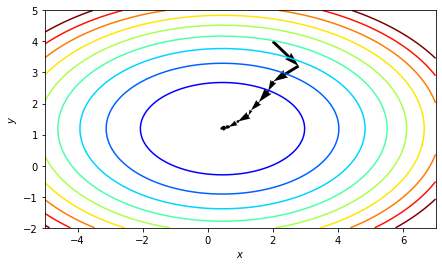

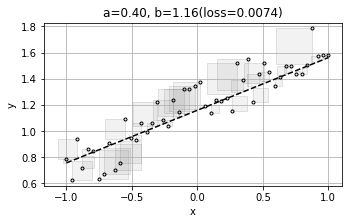

In [ ]:
# RMSProp
batch_size = 5 # 뱃치 크기
MaxEpochs = 2 # 반복 횟수

epsilon = 0.25
delta = 1E-10
rho = 0.9
r = np.zeros_like(w0)

paths = []
batch_loss = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 생략

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정
        r = rho * r  + (1. - rho) * grad * grad
        lr = epsilon / np.sqrt(delta + r)
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1, 
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[0.30 -2.36]	[1.00 -1.00]	2.7654
1-02	[2.41 2.03]	[-0.59 -1.94]	[-0.59 -0.97]	1.0232
1-03	[1.77 1.20]	[-0.56 -1.37]	[-0.64 -0.83]	0.3066
1-04	[1.18 0.47]	[-0.45 -1.04]	[-0.59 -0.72]	0.3536
1-05	[0.69 -0.01]	[-0.33 -0.63]	[-0.49 -0.49]	0.7384
1-06	[0.28 -0.20]	[-0.25 -0.24]	[-0.41 -0.19]	0.9766
1-07	[0.13 -0.14]	[-0.09 0.08]	[-0.15 0.06]	0.9049
1-08	[-0.04 0.08]	[-0.10 0.28]	[-0.17 0.22]	0.6671
1-09	[0.02 0.43]	[0.04 0.45]	[0.07 0.35]	0.3317
1-10	[0.02 0.80]	[-0.00 0.46]	[-0.00 0.37]	0.1173
2-01	[0.04 1.15]	[0.01 0.42]	[0.03 0.36]	0.0366
2-02	[0.14 1.47]	[0.05 0.36]	[0.09 0.31]	0.0623
2-03	[0.25 1.72]	[0.06 0.27]	[0.11 0.25]	0.1519
2-04	[0.34 1.89]	[0.04 0.18]	[0.09 0.17]	0.2528
2-05	[0.38 1.97]	[0.02 0.08]	[0.04 0.08]	0.3102
2-06	[0.41 1.95]	[0.02 -0.02]	[0.03 -0.02]	0.2943
2-07	[0.36 1.84]	[-0.02 -0.11]	[-0.05 -0.11]	0.2199
2-08	[0.37 1.66]	[0.01 -0.18]	[0.02 -0.18]	0.1184
2-09	[0.32 1.44]	[-0.02 -0.21]	[-0.06 -0.22]	0.0416
2-

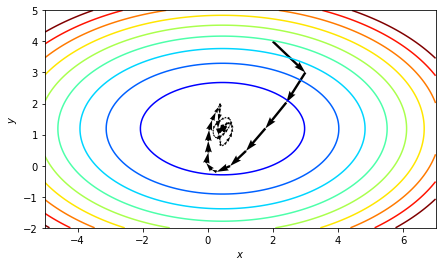

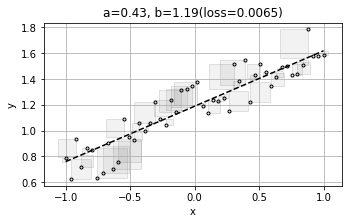

In [ ]:
# Adam
batch_size = 5 # 뱃치 크기
MaxEpochs = 10 # 반복 횟수

epsilon = 1.0
delta = 1E-8
rho1 = 0.9
rho2 = 0.999
s = np.zeros_like(w0)
r = np.zeros_like(w0)
t = 0

paths = []
batch_loss = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 생략

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        
        s = rho1 * s  + (1. - rho1) * grad
        r = rho2 * r  + (1. - rho2) * (grad * grad)
        t += 1
        shat = s / ( 1. - rho1 ** t)
        rhat = r / ( 1. - rho2 ** t)
        
        search_direction = -shat # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정        
        lr = epsilon / (delta + np.sqrt(rhat))
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1, 
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(search_direction, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))